# Atv3 - Etapa 1: Atributos

Atributos analisados: Média, Variância, Skewness, Kurtosis, Energia, Entropia. <br>
Calcular os atributos de primeira ordem para cada imagem, e criar uma matriz

In [49]:
import numpy as np
from skimage.io import imread,imsave,imshow
from skimage.color import rgb2gray
from skimage.exposure import histogram
from skimage.exposure import equalize_hist
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from scipy.stats import skew
from glob import glob
import os
import pandas as pd

In [74]:
def descritor_histograma(imagem):
    # calcula histograma
    # calcular atributos
    media = np.mean(imagem)
    var = np.var(imagem)
    dataframe = pd.DataFrame(imagem)
    sk = dataframe.skew()
    s = skew(sk)

    return {'media': media, 'var': var, 'skew': s}

In [62]:
def ler_cinza(nome):
    imagem = imread(nome)[:,:,:3]
    cinza = rgb2gray(imagem)
    return cinza, imagem

In [63]:
os.listdir('flowers/')

['daisy', 'sunflower', 'tulip', 'rose', 'dandelion']

In [64]:
def contabilizaTamanhos(dataset):
    tamanhos = {'total': 0}
    for classe in dataset:
        tamanhos[classe] = len(dataset[classe])
        tamanhos['total'] += len(dataset[classe])
    dataset['tamanhos'] = tamanhos
    return dataset

def lerDataset(nameDataset):
    dataset = {}
    for classe in os.listdir(nameDataset):
        dataset[classe] = glob(f'flowers/{classe}/*', recursive=True)

    dataset = contabilizaTamanhos(dataset)
    
    return dataset

In [65]:
dataset = lerDataset('flowers')

In [66]:
dataset['tamanhos']

{'total': 4317,
 'daisy': 764,
 'sunflower': 733,
 'tulip': 984,
 'rose': 784,
 'dandelion': 1052}

In [67]:
dataset['daisy'][0:10] # Não preciso abrir todas as imagens, apenas ter os endereços para abrir quando precisar.

['flowers/daisy/14021430525_e06baf93a9.jpg',
 'flowers/daisy/16020253176_60f2a6a5ca_n.jpg',
 'flowers/daisy/7133935763_82b17c8e1b_n.jpg',
 'flowers/daisy/9515186037_3be48fe68f.jpg',
 'flowers/daisy/15327813273_06cdf42210.jpg',
 'flowers/daisy/3285641623_da0e47f49a.jpg',
 'flowers/daisy/9299302012_958c70564c_n.jpg',
 'flowers/daisy/8071646795_2fdc89ab7a_n.jpg',
 'flowers/daisy/5885826924_38fdc6bcaa_n.jpg',
 'flowers/daisy/5512287917_9f5d3f0f98_n.jpg']

In [68]:
imgTesteBlack, imgTesteColor = ler_cinza(dataset['daisy'][0])

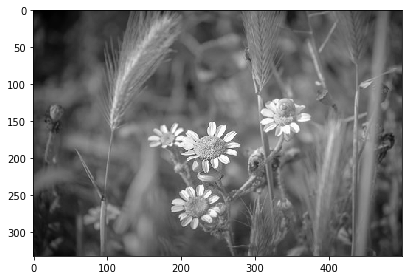

In [69]:
imshow(imgTesteBlack)

In [70]:
imgTesteBlack

array([[0.00959843, 0.01157059, 0.01746431, ..., 0.13544039, 0.13544039,
        0.13544039],
       [0.01549216, 0.01549216, 0.02055255, ..., 0.1449502 , 0.1449502 ,
        0.1449502 ],
       [0.02447412, 0.02447412, 0.02756235, ..., 0.15809882, 0.15809882,
        0.15809882],
       ...,
       [0.02447412, 0.0466502 , 0.08201255, ..., 0.11982941, 0.10387529,
        0.09267608],
       [0.01941373, 0.03486275, 0.06994235, ..., 0.11590784, 0.09995373,
        0.08875451],
       [0.02136314, 0.02868627, 0.06685412, ..., 0.1086302 , 0.09659765,
        0.08932   ]])

In [75]:
descritor_histograma(imgTesteBlack)

{'media': 0.405902741004534,
 'var': 0.025241638889425582,
 'skew': 0.19949379192406502}